<a href="https://colab.research.google.com/github/nhattminh160901/do_an_ptdl_python/blob/main/thongkemota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
a = pd.read_csv('Inc_Exp_Data.csv')

In [4]:
a.sample(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
46,98000,25000,5,0,1152480,Professional,2
16,25000,20000,3,3500,261000,Graduate,1
40,60000,50000,6,10000,590400,Graduate,1
14,24000,10000,4,0,244800,Graduate,2
20,30500,25000,5,5000,351360,Under-Graduate,1
48,100000,50000,4,20000,1032000,Professional,2
6,15000,16000,3,35000,167400,Post-Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
49,100000,40000,6,10000,1320000,Post-Graduate,1
39,60000,10000,3,0,590400,Post-Graduate,1


Định lượng

In [5]:
quantitative = {}
columns_quantitative = ['Mthly_HH_Income', 'Mthly_HH_Expense', 'Emi_or_Rent_Amt', 'Annual_HH_Income']
for column in columns_quantitative:
    print(column)
    describe = a[column].describe()
    print(describe)
    quantitative[column] = a[column]
    print('')

Mthly_HH_Income
count        50.000000
mean      41558.000000
std       26097.908979
min        5000.000000
25%       23550.000000
50%       35000.000000
75%       50375.000000
max      100000.000000
Name: Mthly_HH_Income, dtype: float64

Mthly_HH_Expense
count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64

Emi_or_Rent_Amt
count       50.000000
mean      3060.000000
std       6241.434948
min          0.000000
25%          0.000000
50%          0.000000
75%       3500.000000
max      35000.000000
Name: Emi_or_Rent_Amt, dtype: float64

Annual_HH_Income
count    5.000000e+01
mean     4.900190e+05
std      3.201358e+05
min      6.420000e+04
25%      2.587500e+05
50%      4.474200e+05
75%      5.947200e+05
max      1.404000e+06
Name: Annual_HH_Income, dtype: float64



Định tính

In [6]:
qualitative = {}
columns_qualitative = ['No_of_Fly_Members', 'Highest_Qualified_Member', 'No_of_Earning_Members']
for column in columns_qualitative:
    print(column)
    qualitative[column] = a[column]
    print('')

No_of_Fly_Members

Highest_Qualified_Member

No_of_Earning_Members



In [7]:
a['No_of_Fly_Members'].value_counts()

4    15
6    10
3     9
2     8
5     5
7     2
1     1
Name: No_of_Fly_Members, dtype: int64

In [8]:
a['No_of_Earning_Members'].value_counts()

1    33
2    12
3     4
4     1
Name: No_of_Earning_Members, dtype: int64

In [9]:
a['Highest_Qualified_Member'].describe()

count           50
unique           5
top       Graduate
freq            19
Name: Highest_Qualified_Member, dtype: object

Vẽ biểu đồ

In [10]:
data_quantitative = pd.DataFrame(quantitative)
data_qualitative = pd.DataFrame(qualitative)

Dữ liệu định lượng dùng histogram

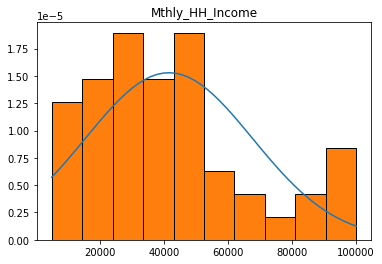

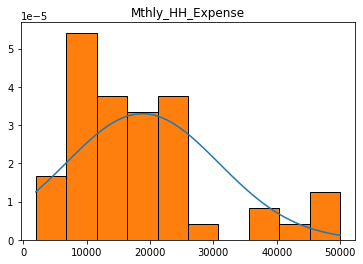

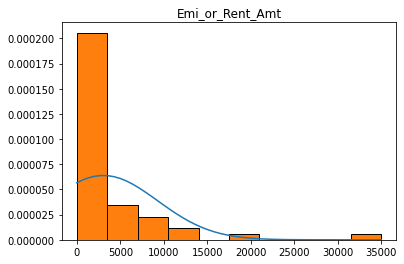

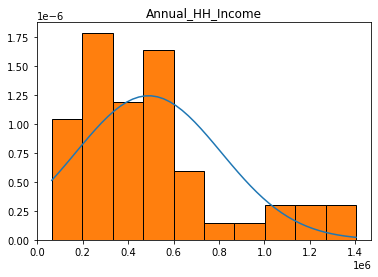

In [11]:
for column in data_quantitative.columns:
    data = data_quantitative[column]
    mean = np.mean(data)
    std = np.std(data,ddof=1)
    domain = np.linspace(np.min(data),np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    plt.hist(data, edgecolor='black', density = True)
    plt.title(column)
    plt.show()

Dữ liệu định tính dùng bar chart nằm ngang

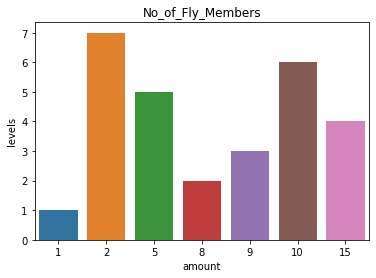

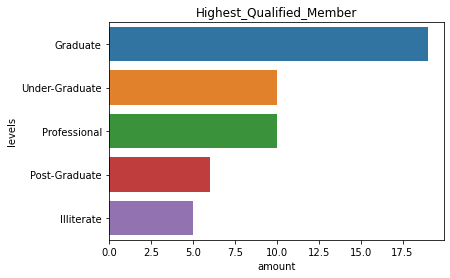

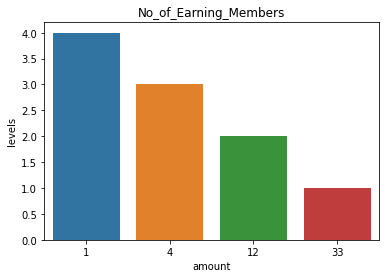

In [12]:
for column in data_qualitative.columns:
    p = {}
    amount = []
    count_data = data_qualitative[column].value_counts()
    levels = count_data.index
    for i in count_data:
        amount.append(i)
    p = {'levels':levels, 'amount':amount}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'levels', x= 'amount', data = data)
    plt.show()

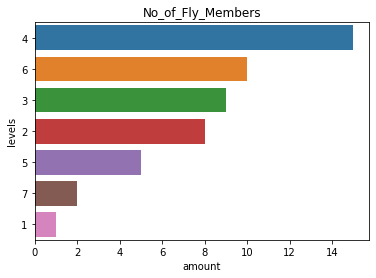

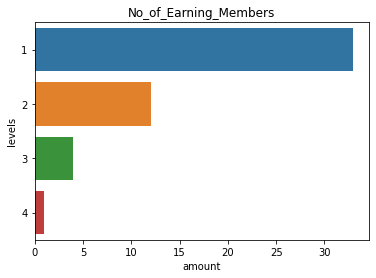

In [13]:
data_qualitative_2 = a[['No_of_Fly_Members','No_of_Earning_Members']]
for column in data_qualitative_2.columns:
    p = {}
    amount = []
    levels = []
    count_data = data_qualitative_2[column].value_counts()
    levels_0 = count_data.index
    for level in levels_0:
        levels.append(str(level))
    for i in count_data:
        amount.append(i)
    p = {'levels':levels, 'amount':amount}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'levels', x = 'amount', data = data)
    plt.show()